Banks are eager to retain as many active customers as possible. Naturally they are curious to know whether their client base needs are met or whether their clients plan to leave the company. If the bank suspects that their client would potentially lean toward another company, the bank can take measures to convince the client to stay (targeted marketing campaign, more personal attitude etc.).

Aim of this notebook is to find the most accurate and precise model to predict, which clients (test data) will stay and which are hesitant and might plan to leave the company. We are using dataset of bank clients (10000 rows) with attributes specified below. Let's jump right into it! 🧩

Dataset has following attributes:

Rownumber: Unique ID for every row

CustomerID: Unique ID for every client

Surname: Client's surname

CreditScore: Client's credit score

Geography: Country of client's origin

Gender: Client's gender

Age: Client's age

Tenure: Number of years for which the client has been with the bank

Balance: Client's balance on account

NumOfProducts: Number of client's products

HasCrCard: Flag whether client has credit card or not

IsActiveMember: Flag whether client is active member of bank or not

EstimatedSalary: Client's annual estimated salary in euros

Exited: Target variable, flag, whether client left the bank or not


# Import the Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import the dataset

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/DL/Churn_Modelling.csv')

# Checking the 1st 5 Rows in our dataset

In [ ]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Explanatory Data Analysis(EDA)

# Firstly Drops RowNumber,CustomerId,Surname these columns. These may not help in model building

In [ ]:
df1.drop(columns = ['RowNumber','CustomerId','Surname'], inplace= True )

In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df1['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Text(0.5, 1.0, 'Comparsion betweeen Countries and Customers')

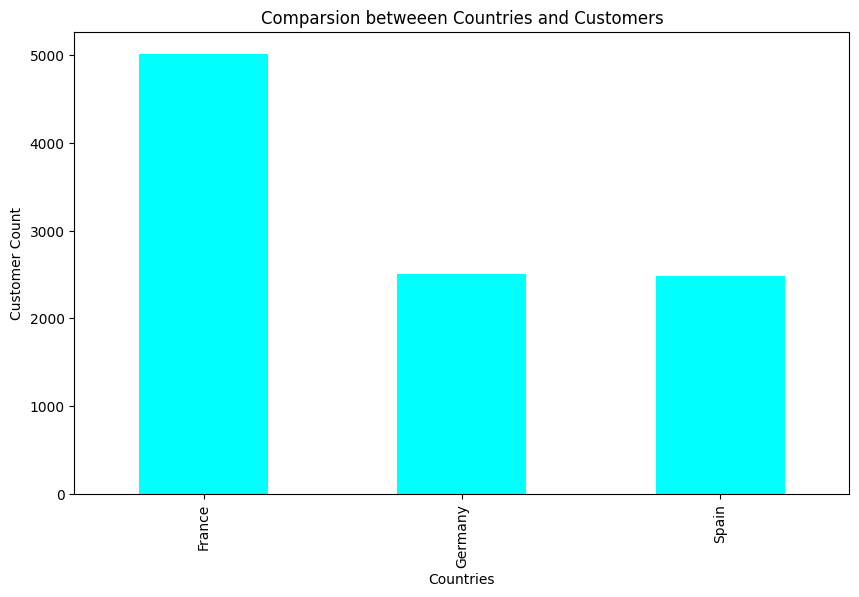

In [ ]:
plt.figure(figsize=(10, 6))
df1['Geography'].value_counts().plot(kind='bar', color = 'cyan')
plt.xlabel('Countries')
plt.ylabel('Customer Count')
plt.title("Comparsion betweeen Countries and Customers")

Text(0.5, 1.0, 'Comparsion betweeen Exited and Customers')

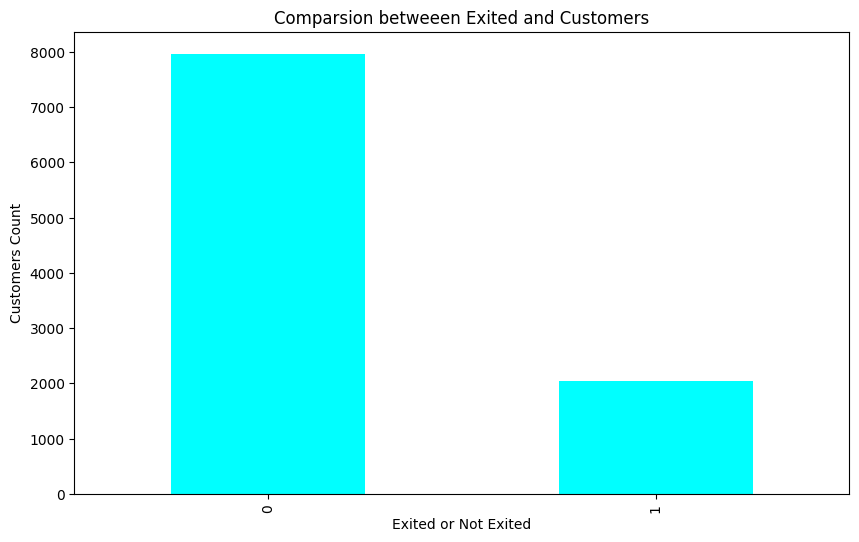

In [ ]:
plt.figure(figsize=(10, 6))
df1['Exited'].value_counts().plot(kind='bar', color = 'cyan')
plt.xlabel('Exited or Not Exited')
plt.ylabel('Customers Count')
plt.title("Comparsion betweeen Exited and Customers")

Text(0.5, 1.0, 'Comparsion betweeen Genders')

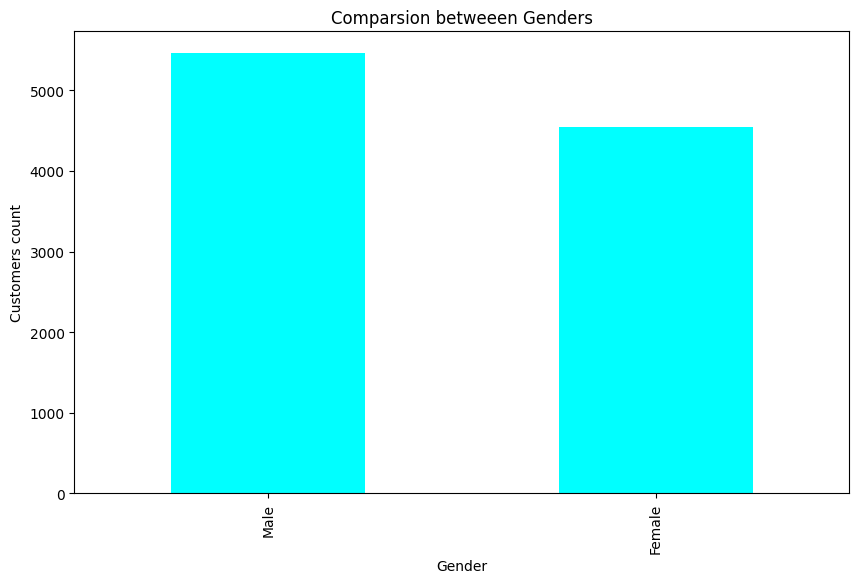

In [ ]:
plt.figure(figsize=(10, 6))
df1['Gender'].value_counts().plot(kind='bar', color = 'cyan')
plt.xlabel('Gender')
plt.ylabel('Customers count')
plt.title("Comparsion betweeen Genders")

# Encoding the Categorical data

In [ ]:
df1= pd.get_dummies(df1, columns= ['Geography', 'Gender'], drop_first=True)

# get_dummies function : For converting categorical columns into numerical columns

In [ ]:
X=df1.drop(columns=['Exited'])
y=df1['Exited']

# Now Split the dataset into train test split using sklearn lib

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state=3)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Building our Model using Artificial Neural Network (ANN)



# Import the Libraries

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential # used for init our ANN model
from tensorflow.keras.layers import Dense # used for different layer structure

# Initialize our ANN model

In [ ]:
# initializing the ANN model
identifier=Sequential()

# Adding the input layer and first hidden layer

In [ ]:
identifier.add(Dense(6,activation='relu',input_dim=11))
identifier.add(Dense(6,activation='relu'))
identifier.add(Dense(1,activation='sigmoid'))

In [ ]:
identifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
identifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
track = identifier.fit(X_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.25)

Epoch 1/100
525/525 [==============================] - 3s 3ms/step - loss: 0.5172 - accuracy: 0.7943 - val_loss: 0.4692 - val_accuracy: 0.8023
Epoch 2/100
525/525 [==============================] - 1s 2ms/step - loss: 0.4540 - accuracy: 0.7958 - val_loss: 0.4388 - val_accuracy: 0.8023
Epoch 3/100
525/525 [==============================] - 1s 2ms/step - loss: 0.4307 - accuracy: 0.7956 - val_loss: 0.4268 - val_accuracy: 0.8029
Epoch 4/100
525/525 [==============================] - 1s 2ms/step - loss: 0.4196 - accuracy: 0.7973 - val_loss: 0.4186 - val_accuracy: 0.8091
Epoch 5/100
525/525 [==============================] - 1s 2ms/step - loss: 0.4113 - accuracy: 0.8067 - val_loss: 0.4105 - val_accuracy: 0.8194
Epoch 6/100
525/525 [==============================] - 1s 2ms/step - loss: 0.4001 - accuracy: 0.8225 - val_loss: 0.3994 - val_accuracy: 0.8251
Epoch 7/100
525/525 [==============================] - 1s 2ms/step - loss: 0.3854 - accuracy: 0.8305 - val_loss: 0.3856 - val_accuracy: 0.8377

# Prediction and Accuracy Result

In [ ]:
# predicting the test set result
y_pred = identifier.predict(X_test)
y_pred = (y_pred>0.5)
y_pred
      

94/94 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

# Confusion metrics

In [ ]:
# Confusion Metric
from sklearn.metrics import confusion_matrix
confusion_metric = confusion_matrix(y_test, y_pred)
confusion_metric

array([[2271,  110],
       [ 320,  299]])

# Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8566666666666667

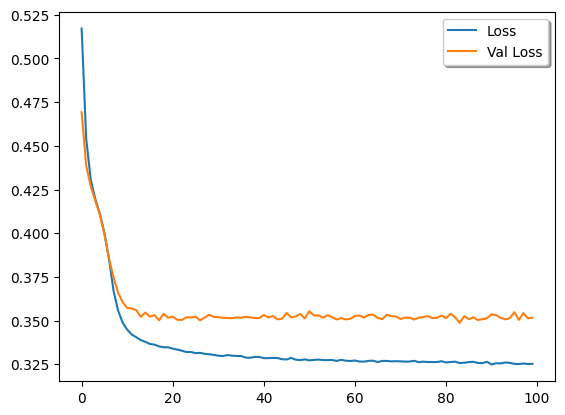

In [ ]:
plt.plot(track.history['loss'])
plt.plot(track.history['val_loss'])
plt.legend(('Loss', 'Val Loss'),
           loc='upper right', shadow=True)

# Graph between loss and val_loss

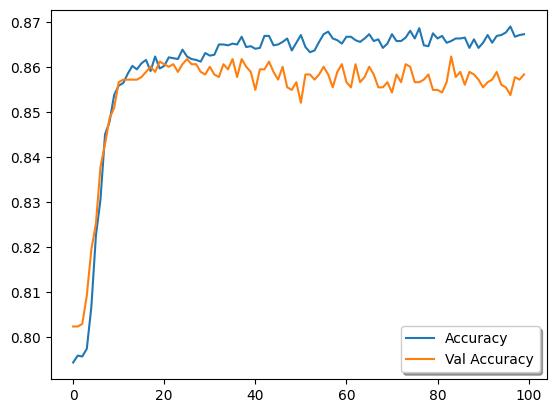

In [ ]:
plt.plot(track.history['accuracy'], label='test')

plt.plot(track.history['val_accuracy'])
plt.legend(('Accuracy', 'Val Accuracy'),
           loc='lower right', shadow=True)